In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import
%matplotlib inline

In [3]:
im = cv.imread('E:/helmet/test/000ab38f-8d69-37c8-b234-209bfff726c6.jpg')

Text(0.5,1,'random')

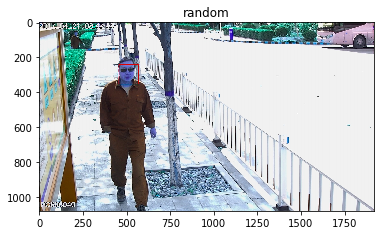

In [13]:
plt.imshow(im)
plt.title("random")

Text(0.5,1,'plt read')

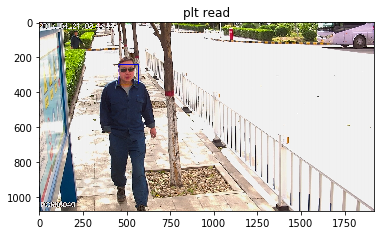

In [14]:
im_1 = plt.imread('E:/helmet/test/000ab38f-8d69-37c8-b234-209bfff726c6.jpg')
plt.imshow(im_1)
plt.title("plt read")

Help on built-in function namedWindow:

namedWindow(...)
    namedWindow(winname[, flags]) -> None
    .   @brief Creates a window.
    .   
    .   The function namedWindow creates a window that can be used as a placeholder for images and
    .   trackbars. Created windows are referred to by their names.
    .   
    .   If a window with the same name already exists, the function does nothing.
    .   
    .   You can call cv::destroyWindow or cv::destroyAllWindows to close the window and de-allocate any associated
    .   memory usage. For a simple program, you do not really have to call these functions because all the
    .   resources and windows of the application are closed automatically by the operating system upon exit.
    .   
    .   @note
    .   
    .   Qt backend supports additional flags:
    .   -   **WINDOW_NORMAL or WINDOW_AUTOSIZE:** WINDOW_NORMAL enables you to resize the
    .   window, whereas WINDOW_AUTOSIZE adjusts automatically the window size to fit the
    .